In [23]:
!pip install soundfile
!pip install librosa  # : librosa는 음악과 오디오를 처리하고 분석하는 Python 패키지

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#exam 1 )  API 샘플코드 실행
import librosa
filename = librosa.example('nutcracker')  # 샘플 데이터

#load(path, *[, sr, mono, offset, duration, ...])
y, sr = librosa.load(filename, duration=20.0) #(파일이름,20초제한 )   음성 데이터 로드
print(y)  # 음성데이터  , 실제 데이터 , 배열로 리턴
print(sr) # 표본 샘플 속도  =   Hz 단위  = 단위 시간당 오디오 데이터의 샘플개수

[ 2.2716861e-06  5.3327212e-06 -7.2473290e-06 ...  7.9551965e-02
  7.2584204e-02  6.9123752e-02]
22050


In [26]:
#음성확인
import IPython.display   #  노트북에서 활용
IPython.display.Audio(data=y, rate=sr)

In [27]:
#로드된 내용을 확인하자.
print(sr ) # 표본샘플 속도 22050 Hz
print (y) #음성데이터
print (len(y)) #전체 샘플의 길이  ->로드된  오디오의  전체 샘플 수
print( len(y) / sr )  #second      ------->  22050의 샘플 속도  ,  441000 샘플데이터 , 20초

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr) # 템포를 비트로 감지할 수 있다.-> 곡의 리듬정보를 리턴

#beats per minute ->BPM   :1분간의 박수를 나타내는 값, 곡의 템포를 나타내는 수치
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))  #112

# 추출된 비트 프레임을 시간(초) 로 변환  -> 음악분석 작업
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

22050
[ 2.2716861e-06  5.3327212e-06 -7.2473290e-06 ...  7.9551965e-02
  7.2584204e-02  6.9123752e-02]
441000
20.0
Estimated tempo: 112.35 beats per minute
[ 1.18421769  1.71827664  2.32199546  2.87927438  3.45977324  4.01705215
  4.59755102  5.13160998  5.7353288   6.29260771  6.84988662  7.40716553
  7.9876644   8.54494331  9.12544218  9.63628118 10.21678005 10.72761905
 11.28489796 11.79573696 12.32979592 12.86385488 13.42113379 13.95519274
 14.4892517  15.02331066 15.55736961 16.09142857 16.62548753 17.15954649]


Text(0.5, 1.0, 'Monophonic')

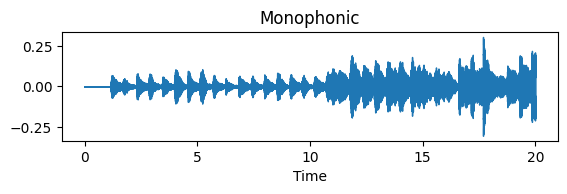

In [28]:
#exam  2 )  API 샘플코드 시각화   => 오디오 신호의 진폭을 시간별로 확인 하자
import matplotlib.pyplot as plt
import librosa.display
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr) #웨이브폼을 가져다가 그래프 표시  -> 오디오 신호의 진폭
plt.title('Monophonic')

In [29]:
#exam 3)   하모니를 살펴 보자 . HPSS(Harmonics/percussives Sound Separation )
# 음원중에 조파음/타악기 음  -> 시간방향으로  또는 주파수 방향으로 매끄럽운 소리를 제외한 양자화 작업

import numpy as np
import librosa

#입력데이터 y를 받아 하모니성분[음성인식] , percussives [리듬패턴] 성분을, 분리해서 리턴
y_harmonic, y_percussive = librosa.effects.hpss(y) # 양자화 분리 작업  -> 음성인식

print (y_harmonic.shape)
print(y_harmonic)  # 오디오 신호의 하모니 값


(441000,)
[ 9.6558847e-07  1.9192139e-06 -2.4968758e-06 ...  5.8013141e-02
  5.1643655e-02  4.2329025e-02]


Text(0.5, 1.0, 'Harmonics+ percussives')

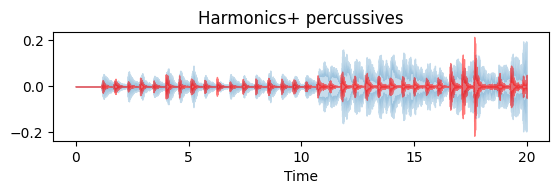

In [30]:
#exam 4)  HPSS 실행 후 시각화  Harmonics+ percussives

plt.subplot(3, 1, 3)
#IPython.display.Audio(data=y_harmonic, rate=sr)
IPython.display.Audio(data=y_percussive, rate=sr)

librosa.display.waveshow(y_harmonic, sr=sr, alpha = 0.25)
librosa.display.waveshow(y_percussive, sr=sr, alpha = 0.5,color='r')

plt.title('Harmonics+ percussives')


In [31]:
#Q1)소리파일을 읽어서  new_file.flac로 저장  _ 파이썬 내장 라이브러리  soundfile
import soundfile as sf
singal, samplerate = sf.read('/content/drive/MyDrive/저녁GPT/day06/test.wav')
sf.write('/content/drive/MyDrive/저녁GPT/day06/new_file.flac', singal, samplerate)
sf.write('/content/drive/MyDrive/저녁GPT/day06/new_file02.flac', singal, samplerate)


In [32]:
import IPython.display as ipd
ipd.Audio('/content/drive/MyDrive/저녁GPT/day06/new_file.flac') # load a local WAV file
ipd.Audio('/content/drive/MyDrive/저녁GPT/day06/new_file.flac') # load a local WAV file


#pdf  ->이미지와 텍스트 분류   / 음성파일   -> 특징추출  -> 분석  (AI,사람음성)
ipd.Audio("http://www.nch.com.au/acm/8k16bitpcm.wav")


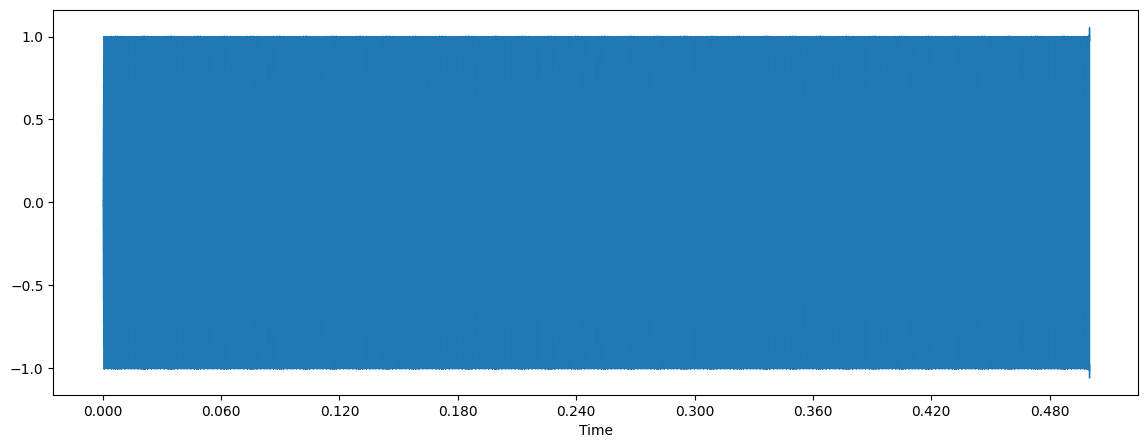

In [33]:
#Q2) 차트로 표현
import matplotlib.pyplot as plt
import librosa.display
import librosa
x, sr = librosa.load('/content/drive/MyDrive/저녁GPT/day06/new_file.flac')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [34]:
#Q3)블럭 사이즈 변환 : 소리파일  -> 평균제곱근을 구한 내용 -> 오디오 신호 진폭(볼륨)  을 구할 수 있다.
#  blocksize=1024   : 블럭의 샘플 수
#  overlap=512  = 윈도우 효과     : 데이터 연속성  / 경계면에서 손실을 최소화 하기 위해
import numpy as np
import soundfile as sf

rms = [np.sqrt(np.mean(block**2)) for block in  sf.blocks('/content/drive/MyDrive/저녁GPT/day06/test.wav',
                                                          blocksize=1024, overlap=512)]
rms

[0.8805804726803139,
 0.8837668755893155,
 0.8856811836453272,
 0.885805953186899,
 0.8858205019976514,
 0.8858059135936502,
 0.8858045464498615,
 0.8858204568545733,
 0.8858075310486022,
 0.8858039269409289,
 0.8849405862704309,
 0.8821140828628302,
 0.8795501033473383,
 0.8798636395558723,
 0.882795685777142,
 0.8852965048838334,
 0.8858052062123525,
 0.8858210684271681,
 0.8858080451129122,
 0.8858044267514984,
 0.8858202351510805,
 0.8858087112616833,
 0.8858044517609373,
 0.8854769551666237,
 0.883152522419553,
 0.8800797104334487,
 0.8794407148403491,
 0.8817294428821838,
 0.8846815564649013,
 0.8858039195257769,
 0.8858197426817987,
 0.8858082774842033,
 0.8858039053628569,
 0.885818637418127,
 0.88580840622711,
 0.8858047036033185,
 0.8857716727969507,
 0.8840791538495673,
 0.8808966530621474,
 0.879320483158435,
 0.8807026598952594,
 0.8838755756764125,
 0.8931719817542882]

In [35]:
#Q4) 음성로드
import librosa

filename = librosa.example('nutcracker')
y, sr = librosa.load(filename, duration=20.0)


In [36]:
#Q5) 음성확인
import IPython.display
IPython.display.Audio(data=y, rate=sr)

In [37]:
#Q6) 음성정보검색
#22050 샘플 속도, 441000 샘플 데이터, 20초
print(sr) # sampling rate
print(y)
print(len(y)) # total sample
print(len(y)/sr) # second

22050
[ 2.2716861e-06  5.3327212e-06 -7.2473290e-06 ...  7.9551965e-02
  7.2584204e-02  6.9123752e-02]
441000
20.0


In [38]:
#Q7) 비트 트랙커  : 템포, 비트를 감지
#BPM: Beat Per Minute 은 1분간의 박수를 나타내는 값으로 곡의 템포를 나타내는 수치.
# Run beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# tempo beats per minute
print(f'Estimate tempo {tempo :.2f} beats per minute')

Estimate tempo 112.35 beats per minute


Text(0.5, 1.0, 'Monophonic')

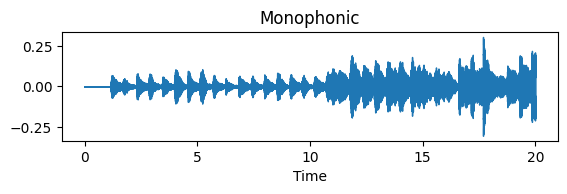

In [39]:
#Q8) 음성 시각화
#Matplotlib에서 음성을 시각화
import matplotlib.pyplot as plt
import librosa.display

plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Monophonic')

### harmonic-percussive
- HPSS(Harmonic/Percussive Sound Separation):음원중의 조파음/타악기음이, 각각 시간 방향으로 매끄럽거나/주파수 방향으로 매끄럽다는 다른 성질을 가지는 것을 이용해, 양자를 분리하는 방법!

- y_harm, y_perc 와의 harmonic-percussive 음성을 간단하게 사용

In [40]:
#Q9) harmonic-percussive
import librosa.display

y_harm, y_perc = librosa.effects.hpss(y)
print(y_harm.shape)
print(y_harm)

(441000,)
[ 9.6558847e-07  1.9192139e-06 -2.4968758e-06 ...  5.8013141e-02
  5.1643655e-02  4.2329025e-02]


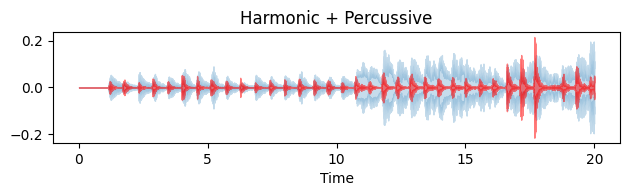

In [41]:
#Q10) harmonic-percussive 시각화
plt.subplot(3, 1, 3)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.25)
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()
plt.show()

###  Q11)스펙트로그램
- 음성 신호에 「단시간 푸리에 변환(Short-time Fourier transform : STFT)」을 실시함으로써 스펙트로그램을 리턴 받을 수 있다.

- harmonic-percussive의 스펙트로그램을 시각화하면 스펙트로그램의 이미지 데이터는 이미지의 심층 학습 네트워크에 입력될 수 있다.

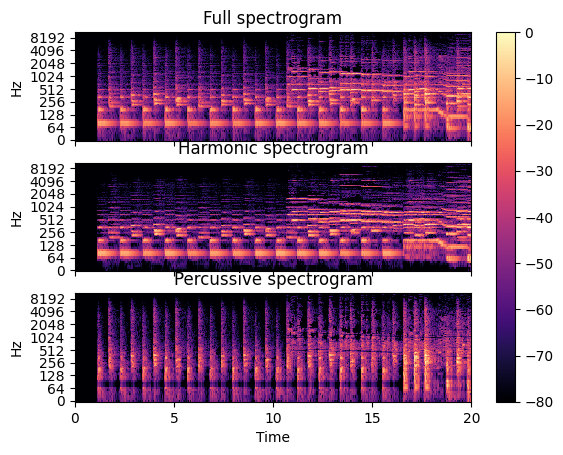

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display


D = librosa.stft(y) # 로드된 데이터를 스펙트럼 알고리즘 적용
D_harmonic, D_percussive = librosa.decompose.hpss(D)  # 양자화 분리

## 입력 스펙트럼에서 전역 기준 전력을 미리 계산
rp = np.max(np.abs(D))
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp),
y_axis='log', x_axis='time', ax=ax[0])

ax[0].set(title='Full spectrogram')
ax[0].label_outer()



librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic spectrogram')
ax[1].label_outer()



librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive spectrogram')
fig.colorbar(img, ax=ax)

### Q12) 볼륨 계산

In [43]:
filename = librosa.example('nutcracker')  # 샘플 데이터
y, sr = librosa.load(filename)
rms = librosa.feature.rms(y=y)  #음압 레벨(음량)을 나타내는 것 Pa, dB로 변환작업    1Pa = 94db
#db 변환  1 . 지정된 상수값으로 음량을 나타내는 db

dB  = 2e-5 # 1Pa = 94db 상수값
#db 변환
x= 20*np.log10(rms /dB)   #음량을 나타내는 dB

# 2. 오디오 파일에 대한 평균 볼륨을 계산
y= np.average(x)
y  #66.56407[dB]

66.56407

In [44]:
#Q12.주어진 음악의 샘플을 통해서 볼륨을 구해보자.
# 데이터로드  샘플링 추출 load -> 특징추출   feature.rms -> 볼륨연산  my_dB
# 오디오 파일  -> 데시벨 볼륨을 구한다.  -> 소리의 강도
# frame_length: 각 프레임에서 사용될 샘플의 수  -> 주파수 해상도를 높이지만 시간의 해상도는 낮춘다.
# hop_length: 연속적인 프레임의 간격  ->  값이 작을 수록 더 많은 프레임이 생성되고 시간 해상도를 높이는 대신
#               계산이 복잡도는 증가시킨다.
def my_dB(rms ):  # RMS -> db 변환하는 함수
    a = 2e-5
    x= 20*np.log10(rms /a)  #소리의 강도를 로그스케일로 만들어서 확인
    dB= np.average(x)
    return dB

filename = librosa.example('nutcracker')  # 샘플 데이터
y, sr = librosa.load(filename)
rms =  librosa.feature.rms(y=y , frame_length=2048 , hop_length = 512)
print('frame_length=2048 , hop_length = 512 볼륨은 =' , my_dB(rms ),'[db]' )
rms =  librosa.feature.rms(y=y , frame_length=4096 , hop_length = 512)
print('frame_length=4096 , hop_length = 512 볼륨은 =' , my_dB(rms ),'[db]' )
rms =  librosa.feature.rms(y=y , frame_length=2048 , hop_length = 1024)
print('frame_length=2048 , hop_length = 1024 볼륨은 =' , my_dB(rms ),'[db]' )
rms =  librosa.feature.rms(y=y , frame_length=4096 , hop_length = 1024)
print('frame_length=4096 , hop_length = 1024 볼륨은 =' , my_dB(rms ),'[db]' )

frame_length=2048 , hop_length = 512 볼륨은 = 66.56407 [db]
frame_length=4096 , hop_length = 512 볼륨은 = 66.84647 [db]
frame_length=2048 , hop_length = 1024 볼륨은 = 66.5513 [db]
frame_length=4096 , hop_length = 1024 볼륨은 = 66.833145 [db]


### Q13) 음높이 계산   YIN, pYIN

In [45]:
# yin = 표준주파수(f0)를 이용한  알고리즘을 이용해서 음고를 리턴받자.  librosa.note_to_hz()
import librosa
import numpy as np
import pandas as pd

filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)
F0 = librosa.yin(y, fmin= librosa.note_to_hz('C2') , fmax =librosa.note_to_hz('C7'))
print(librosa.note_to_hz('C2') ,librosa.note_to_hz('C7')  )  #65Hz  , 2093 Hz

df_f0 = pd.Series(F0)
df_f0 = df_f0.dropna(how='all')
print(df_f0.describe())
#nutcracker 의 평균 소리의 높이는  약 158Hz를 리턴한다.

65.40639132514966 2093.004522404789
count    5163.000000
mean      158.762032
std       227.771572
min        65.236686
25%        82.541770
50%        99.674670
75%       164.692571
max      2205.000000
dtype: float64


In [46]:
#!pip install pandas

In [47]:
import librosa
import pandas as pd  # 판다스 모듈   -> 공통 윈도우 통계함수
# pyin 알고리즘을 이용해서 음고를 리턴받자.  librosa.note_to_hz()
#pyin  = 표준주파수 + 확률
filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)
F0, voiced_flag,voiced_prob  = librosa.pyin(y, fmin= librosa.note_to_hz('C2') , fmax =librosa.note_to_hz('C7'),fill_na=None)
print(librosa.note_to_hz('C2') ,librosa.note_to_hz('C7')  )  #65Hz  , 2093 Hz

df_f0 = pd.Series(F0) #음의 높이를(F0) ,
df_f0
df_f0 = df_f0.dropna(how='all')  # 모든 값의 Nan을 삭제 한다
print(df_f0.describe())  #  공통 윈도우 통계함수
#nutcracker 의 평균 소리의 높이는  약 118Hz를 리턴한다.

65.40639132514966 2093.004522404789
count    5163.000000
mean      118.284873
std        67.680002
min        65.406391
25%        73.841488
50%        93.034445
75%       147.682975
max       757.285265
dtype: float64


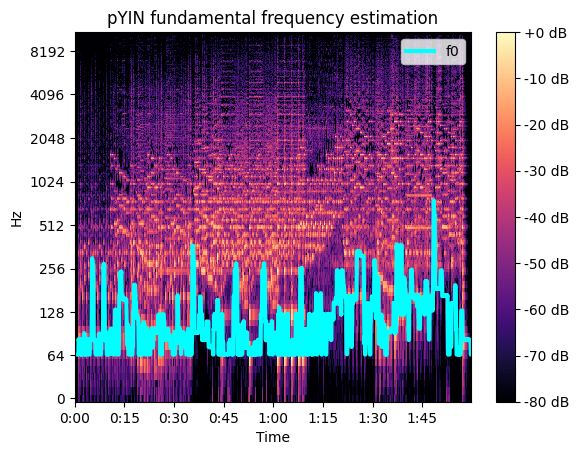

In [48]:
import matplotlib.pyplot as plt

times = librosa.times_like(F0)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')

fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, F0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [49]:
# 영상(이미지) 주파수 영역 분리  -> 디지털 신호 처리  ->  푸리에 변환, 웨이브 변환 , Discrete-CosineT

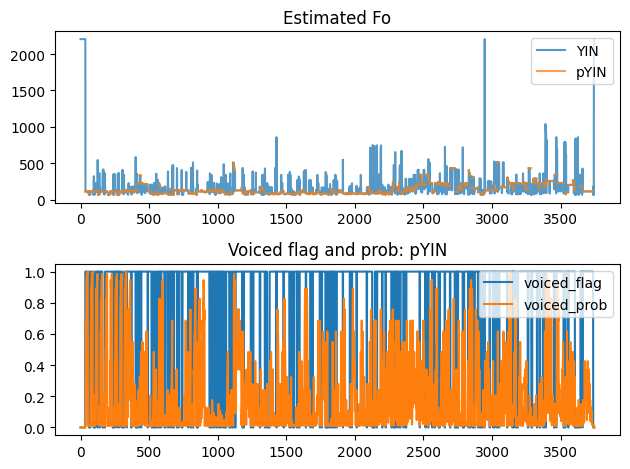

In [50]:
#Q13-1)두개의 음고결과를 비교 해보자
import librosa
import matplotlib.pyplot as plt


filename = librosa.example('nutcracker')
sr = 16000
y, sr = librosa.load(filename, sr=sr, mono= True )

fmin, fmax = librosa.note_to_hz('C2'), librosa.note_to_hz('C7')
fo_yin = librosa.yin(y=y, fmin=fmin, fmax=fmax)

fo_pyin, voiced_flag, voiced_prob = librosa.pyin(y=y, fmin=fmin, fmax=fmax)
#fo_pyin  : 각프레임에서 추정된 기본 주파수
#voiced_flag : 소리의 유성, 무성음인지 판별
#voiced_prob  : 각 프레임의 음성 확률


plt.subplot ( 2 , 1 , 1 );
plt.plot (fo_yin, label = "YIN" , alpha = 0.75 );
plt.plot (fo_pyin, label = "pYIN" , alpha = 0.75 );
plt.legend(loc= 'upper right' );
plt.title( "Estimated Fo" );

plt.subplot ( 2 , 1 , 2 )
plt.plot (voiced_flag, label = "voiced_flag" );
plt.plot (voiced_prob, label = "voiced_prob" );
plt.title( "Voiced flag and prob: pYIN" );
plt.legend(loc= 'upper right' );

plt.tight_layout();
plt.show();

# 음고 비교하게 되면 같은 음고의 발화자 발생을 확인  (감성분석(30%), 감정분석(70%) )
# 두 음고가 가깝다면  소리가 하모닉하게 된다.  -> 일정하다.

### Q14) MFCC  :   음성대상의 각 MFCC 계수를 비교 해서  음을 식별, 분류 할 수 있다.   
음색을 분석할 수 있다.

**굵은 텍스트**
대상  -> 특징 벡터  -> 오디오 클립   = MFCC  -> 전력 스펙트럼 밀도
1.   신호 프레임지정
2.   윈도우 기능적용
3.   FFT   : 각 프레임을 시간영역에서 주파수 영역으로 변환
4.   멜 필터
5.   로그
6.   DCT

(20, 5163)
[-602.36005 -602.36005 -602.36005 ... -602.36005 -602.36005 -602.36005]


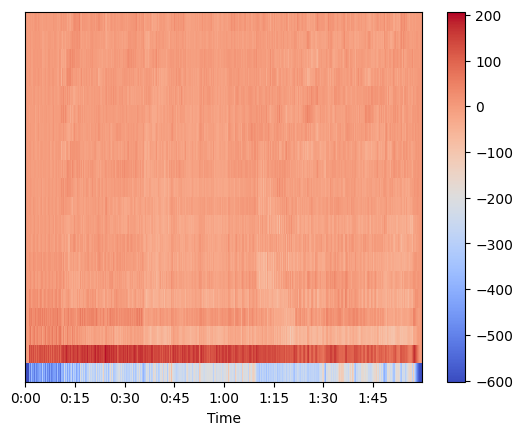

In [51]:
#14-1)  librosa MFCC
import librosa
import matplotlib.pyplot as plt

#1. 데이터 로드
filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)
#2.mfcc  -> 마이크 품질
mfccs = librosa.feature.mfcc(y=y, sr=sr) # Mnp.ndarray [shape=(…, n_mfcc 기능수, t 시간 프레임수 )]
print(mfccs.shape)  #(20, 5163)  -> 데이터에 20개의 MFCC 기능과 5163개의 시간프레임이 있다. ->오디오신호의 음색 질감 캡슐화작업
print(mfccs[0])

#3.시각화
import librosa.display
librosa.display.specshow(mfccs, sr=sr, x_axis='time');
plt.colorbar();
#

**굵은 텍스트**
mfcc(y=y, sr=sr, n_mfcc=n_mfcc,dct_type = 3 )

1.   dct_type  = 2 (기본)
2.   dct_type  = 3 (DCT연산 역변)   -> 대칭행렬사용 푸리에 보다 빠름
3.   DCT 선형변환   -> 신호처리 -> 실수 계수(특징)  
4.   계수가 0에 가까울 수록  이미지압축의 효율성이 좋다.



In [52]:
# 14-2
#1. 데이터 로드
n_mfcc =20  #특징 벡터 차원수   12~24차원의 수를 특징벡터로 만들어 분석이나 기계학습에 사용
filename = librosa.example('nutcracker')
y, sr = librosa.load(filename , sr = 16000)

#2.mfcc 를  중간 신호를  리턴
mfccs_tmp = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc,dct_type = 3 ) # Mnp.ndarray [shape=(…, n_mfcc, t)]

#3. 진폭 스펙트롬 계산
D = np.abs(librosa.stft(y))
D_dB = librosa.amplitude_to_db(D, ref=np.max) #스펙트롬 계산

#4.멜 스펙트로 계산
s= librosa.feature.melspectrogram(S=D, sr = sr)
S_dB =  librosa.amplitude_to_db(s, ref=np.max) #스펙트롬 계산

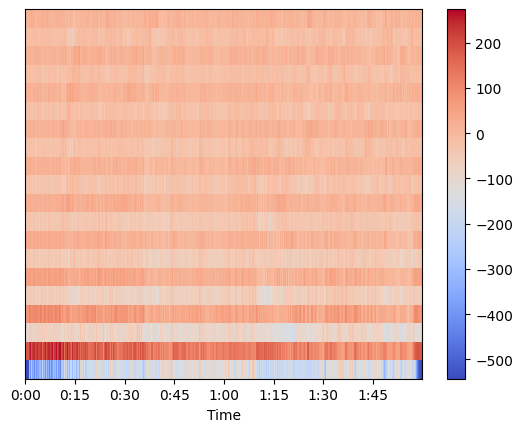

In [53]:
#5.시각화
import librosa.display
librosa.display.specshow(mfccs_tmp, sr=sr, x_axis='time');
plt.colorbar();

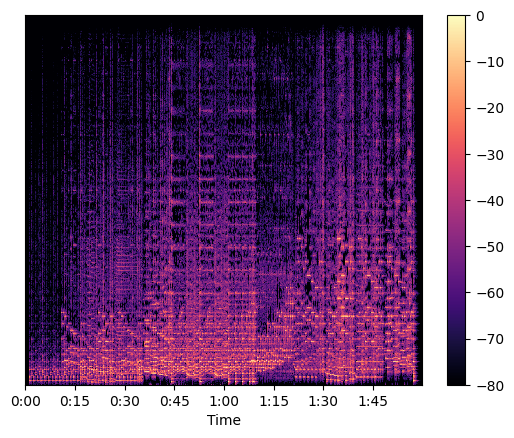

In [54]:
librosa.display.specshow(D_dB, sr=sr, x_axis='time');
plt.colorbar();

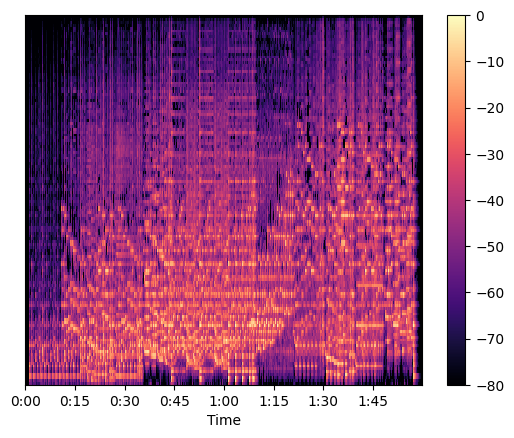

In [55]:
librosa.display.specshow(S_dB, sr=sr, x_axis='time');
plt.colorbar();